In [1]:
import numpy as np
import yt
import yt.units as u
import matplotlib.pyplot as plt
import os

In [2]:
from scipy.ndimage.filters import gaussian_filter
from scipy.integrate import simps
from scipy.integrate import cumtrapz
from scipy import interpolate
from scipy import stats
import os
import argparse, sys

In [128]:
def dmdt(raw, mbh=7e7, ax=None):
    try:
        if ax==None:
            f, ax = plt.subplots(2, 1, figsize=(12, 12))
    except:
        pass
    e, dm = raw[0], raw[1]
    e, dm = e[dm != 0], dm[dm != 0]
    de = e[1] - e[0]
    dm_de = dm / de
    s_dm_de = gaussian_filter(dm_de, 20, mode='wrap')
    slog_dm_de = np.log10(s_dm_de)
    M_bh = mbh * u.Msun
    G = u.gravitational_constant
    yr = u.yr
    M_sun = u.Msun
    e_bound = e[np.where(e < 0.)] * u.erg / u.gram
    D = 188 * u.Mpc
    t = (2. * np.pi * G * M_bh / ((2 * np.abs(e_bound))**(3. / 2))).in_units('day')
    de_dt = (1. / 3) * ((2. * np.pi * G * M_bh)**(2. / 3)) * t**(-5. / 3)
    dm_de_bound = s_dm_de[np.where(e < 0.)] * u.g / (u.erg / u.g)
    dm_de_bound_orig = dm_de[np.where(e < 0.)] * u.g / (u.erg / u.g)
    mdot = (dm_de_bound * de_dt).in_units('Msun/yr')
    mdot_orig = (dm_de_bound_orig * de_dt).in_units('Msun/yr')
    L = (mdot * 0.06 * u.c**2 / np.pi / 4 / D**2).in_units('erg/s/cm**2')
    L_orig = (mdot_orig * 0.06 * u.c**2 / np.pi / 4 / D**2).in_units('erg/s/cm**2')

    # plot unsmoothed
    ax[0].scatter(t, mdot_orig, s=0.1, alpha=0.5)
    ax[0].scatter(t, mdot, s=1)
    ax[1].scatter(e, dm_de, s=0.5)
    ax[1].set_yscale('log')
    ax[0].set_xlabel('Time (day)', fontsize=20)
    ax[0].set_ylabel(r'$\dot M$ (Msun/yr)', fontsize=20)
    ax[1].set_xlabel('$\epsilon$ (erg/g)', fontsize=20)
    ax[1].set_ylabel(r'd$M$/d$\epsilon$ (g$\cdot$s$^2$/cm$^2$)', fontsize=20)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.tight_layout()
    return ax

In [121]:
def load_raw(filename):
    try:
        raw = np.loadtxt(filename)
    except:
        with open(filename, "r") as f:
            lines = f.readlines()
            for i in range(4):
                lines[i] = '#' + lines[i]
        with open(filename, "w") as f:
            f.writelines(lines)
        raw = np.loadtxt(filename)
    return raw

In [125]:
raw1 = load_raw('../../TDE_plot/b10000_ev_bhbound_histogram_multitidal_hdf5_chk_0060.dat')
raw2 = load_raw('../../TDE_plot/b10000_ev_bhbound_histogram_multitidal_hdf5_chk_0100.dat')

(0.001, 0.07)

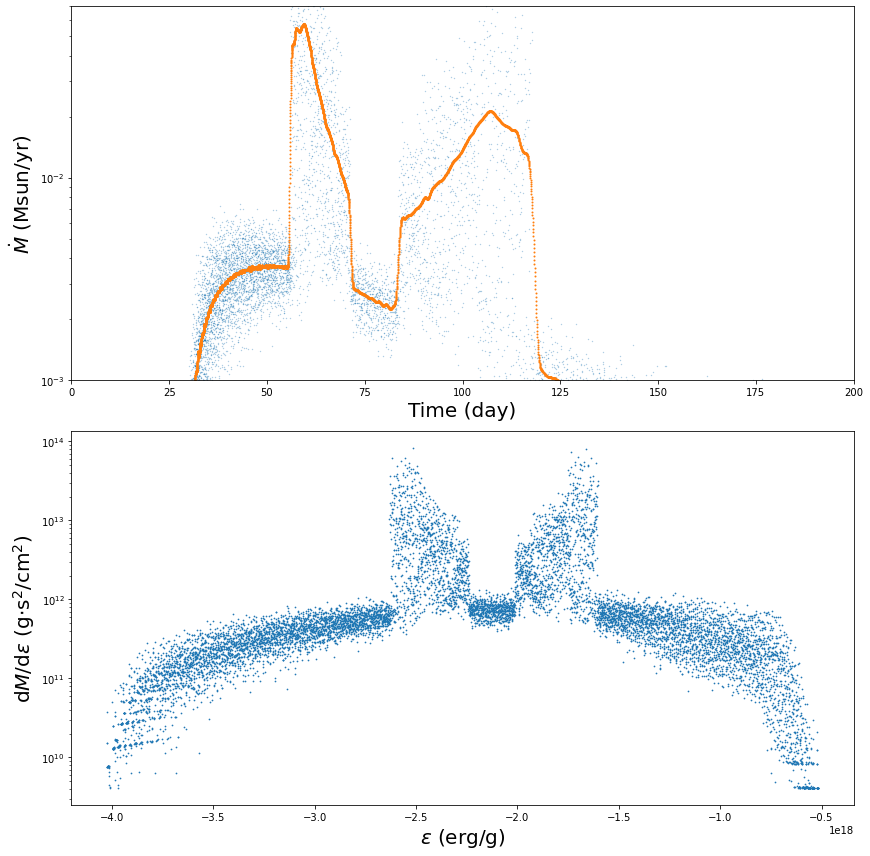

In [126]:
ax = dmdt(raw1)
ax[0].set_xlim([0, 200])
ax[0].set_yscale('log')
ax[0].set_ylim([1e-3, 7e-2])

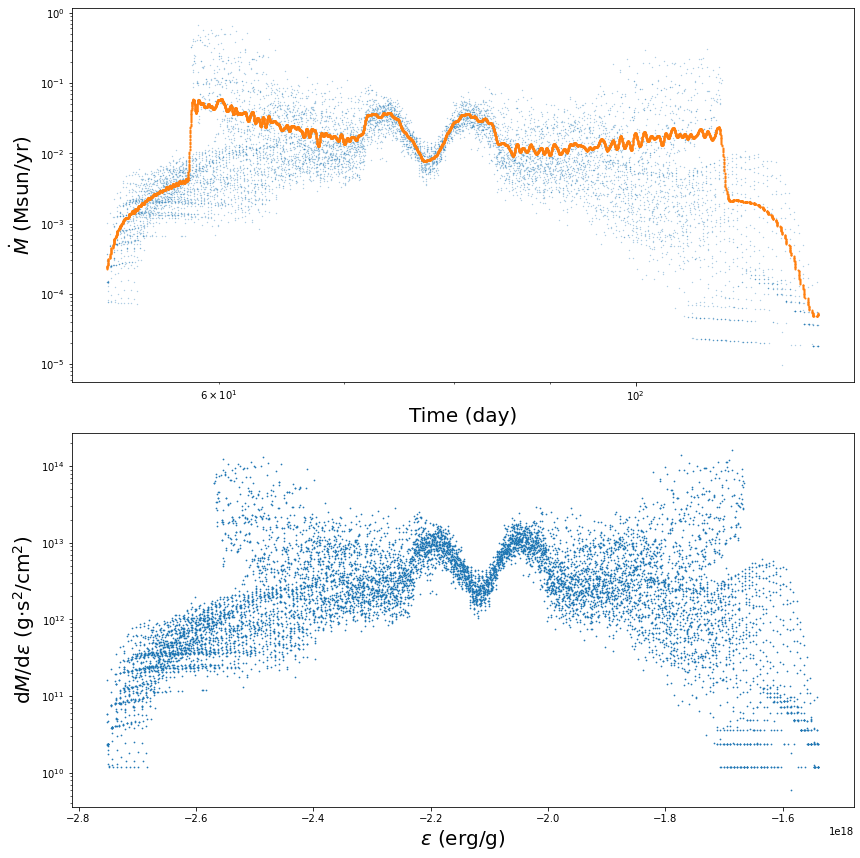

In [130]:
f, ax = plt.subplots(2, 1, figsize=(12, 12))
#ax = dmdt(raw1, ax=ax)
ax = dmdt(raw2, ax=ax)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
#ax[0].set_xlim([1000, 100000])
#ax[0].set_ylim([1e-6, 4e-4])

In [131]:
raw3 = load_raw('../../TDE_plot/b1000_ev_bhbound_histogram_multitidal_hdf5_chk_0060.dat')